task 1:

In [1]:
import numpy as np
a = np.random.random((10,3))
print(a)

[[0.71880255 0.93741159 0.7857069 ]
 [0.08470927 0.68120589 0.22008913]
 [0.5624791  0.96711176 0.18794662]
 [0.90234401 0.5541229  0.23010139]
 [0.40750349 0.40805699 0.81311942]
 [0.5421042  0.95216893 0.94126073]
 [0.98563902 0.04307073 0.87851604]
 [0.14170517 0.5603987  0.92960221]
 [0.18182987 0.8888953  0.59985726]
 [0.79058284 0.87248915 0.94124255]]


In [2]:
for i in range(0, 10):
    near = a[i][0]
    for j in range(0,3):
        c = (0.5 - a[i][j]) 
        c = abs(c)
        if (c) < (0.5 - near):
            near = a[i][j]
    print ("nearest to 0.5 in ", i, "string is ", near)

nearest to 0.5 in  0 string is  0.7188025546495523
nearest to 0.5 in  1 string is  0.681205894548332
nearest to 0.5 in  2 string is  0.562479104748354
nearest to 0.5 in  3 string is  0.9023440080380687
nearest to 0.5 in  4 string is  0.4080569932220326
nearest to 0.5 in  5 string is  0.5421042022230348
nearest to 0.5 in  6 string is  0.9856390210535422
nearest to 0.5 in  7 string is  0.5603986954200938
nearest to 0.5 in  8 string is  0.599857261870391
nearest to 0.5 in  9 string is  0.7905828386928543


task 2:

In [3]:
import numpy as np
arr = np.random.random((6,6))
print(arr)

[[0.64041973 0.25691821 0.34876469 0.03477747 0.6416     0.44937071]
 [0.00921096 0.32392489 0.86195451 0.68552849 0.53841707 0.11448821]
 [0.5775671  0.14559219 0.03515236 0.50241951 0.92921255 0.9391895 ]
 [0.39216106 0.04325344 0.44509352 0.9318635  0.36500427 0.46300627]
 [0.36694869 0.87740728 0.70563986 0.45964971 0.53321133 0.50938003]
 [0.35058235 0.90162908 0.5403116  0.77610344 0.21661042 0.28735801]]


In [4]:
for i in range(0,6):
    s = 0
    for j in range(0,6):
        s += arr[i][j]
    minn = arr[0][i]
    for k in range(1,6):
        if arr[k][i] < minn:
            minn = arr[k][i]
        b = s / minn
    print("result for", i,"is", b)

result for 0 is 257.5031484817414
result for 1 is 58.573933664336124
result for 2 is 89.01629442086289
result for 3 is 75.92219505755492
result for 4 is 15.93753818607742
result for 5 is 26.83765384250529


task 3:

In [5]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
maxx = 0
for i in range(0, 8):
    if (x[i] == 0):
        if (x[i+1] > maxx):
            maxx = x[i+1]
print("max after 0 is", maxx)

max after 0 is 5


task 4:


In [6]:
import numpy as np
y = np.ones(10)
p = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in range(0,8):
    y[p[j]] += 1
print(y)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


task 5:

In [124]:
def recalc (obs, codebook):
    newbook = np.empty((len(codebook),len(codebook[0])))
    distortion = distance.cdist(obs, codebook, 'sqeuclidean')
    temp = np.hstack((obs, distortion.argmin(axis=1).reshape(len(distortion),1)))
    for i in range(len(codebook)):
        newbook[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
    return newbook

In [125]:
def kmeans(obs, k_or_guess, iter=20, thresh=1e-05): #k_or_guess has int or ndarray type
    if type(k_or_guess) == int:
        codebook = obs[np.random.choice(range(len(obs)), k_or_guess, False)]
    else:
        codebook = k_or_guess
    dist_pr = -1
    dist_cr = distance.cdist(obs, codebook, 'sqeuclidean').min(axis = 1).sum()
    while abs(dist_cr - dist_pr) > thresh:
        codebook = recalc (obs, codebook)
        dist_pr = dist_cr
        dist_cr = distance.cdist(obs, codebook, 'sqeuclidean').min(axis = 1).sum()   
    return codebook, dist_cr

task 6:

In [126]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5] 

array([['0001', 'Male', '19', '15', '39'],
       ['0002', 'Male', '21', '15', '81'],
       ['0003', 'Female', '20', '16', '6'],
       ['0004', 'Female', '23', '16', '77'],
       ['0005', 'Female', '31', '17', '40']], dtype=object)

In [127]:
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

array([[ 1.,  1., 19., 15., 39.],
       [ 2.,  1., 21., 15., 81.],
       [ 3.,  0., 20., 16.,  6.],
       [ 4.,  0., 23., 16., 77.],
       [ 5.,  0., 31., 17., 40.]])

In [128]:
def standardization(data):  
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mean)/std

In [129]:
standardized = standardization(data[:,2:])
print(standardized[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


test №1

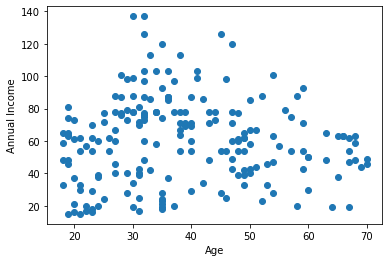

In [130]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

<ipython-input-124-387cec4b611a>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newbook[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]


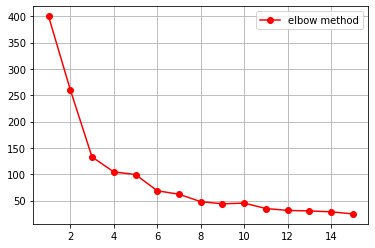

In [131]:
distortion_k = np.empty(15)
for i in range(1,16):
    codebook, dist = kmeans(standardized[:,[0,1]], i)
    distortion_k[i-1] = dist
plt.plot(range(1,16), distortion_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

optimal k=3

<ipython-input-124-387cec4b611a>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newbook[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-132-c951bcdbcba4>:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-132-c951bcdbcba4>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block2 = np.vstack(row for row in matrix if row[-1] == 1)


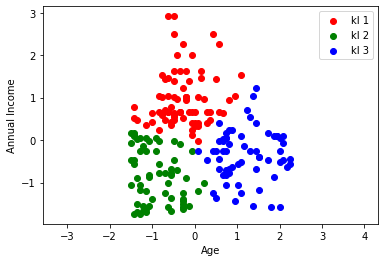

In [132]:
codebook, dist = kmeans(standardized[:,[0,1]], 3)
distortion = distance.cdist(standardized[:,[0,1]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,1]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)

plt.scatter(block1[:,0], block1[:,1], c='r', label='kl 1')
plt.scatter(block2[:,0], block2[:,1], c='g', label='kl 2')
plt.scatter(block3[:,0], block3[:,1], c='b', label='kl 3')
plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

test №2

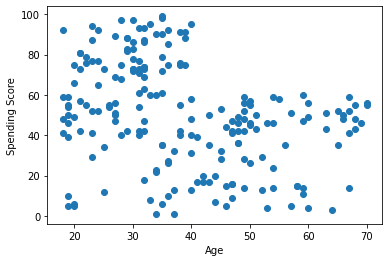

In [133]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

<ipython-input-124-387cec4b611a>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newbook[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]


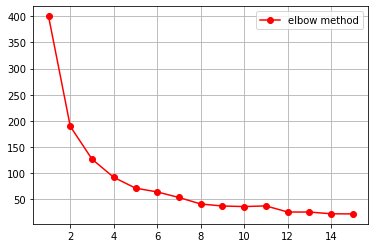

In [135]:
distortion_k = np.empty(15)
for i in range(1,16):
    codebook, dist = kmeans(standardized[:,[0,2]], i)
    distortion_k[i-1] = dist
plt.plot(range(1,16), distortion_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

optimal k=7

<ipython-input-124-387cec4b611a>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newbook[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-136-f92bea1f6fc9>:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-136-f92bea1f6fc9>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block2 = np.vstack(row for row in matrix if row[-1] == 1)
<ipython-input-136-f92bea1f6fc9>:7: FutureWarning:

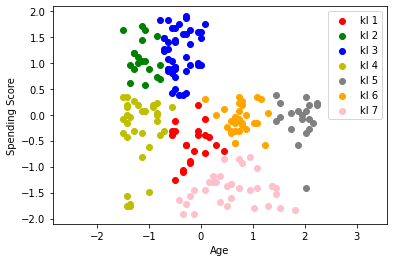

In [136]:
codebook, dist = kmeans(standardized[:,[0,2]], 7)
distortion = distance.cdist(standardized[:,[0,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)
block5 = np.vstack(row for row in matrix if row[-1] == 4)
block6 = np.vstack(row for row in matrix if row[-1] == 5)
block7 = np.vstack(row for row in matrix if row[-1] == 6)


plt.scatter(block1[:,0], block1[:,1], c='r', label='kl 1')
plt.scatter(block2[:,0], block2[:,1], c='g', label='kl 2')
plt.scatter(block3[:,0], block3[:,1], c='b', label='kl 3')
plt.scatter(block4[:,0], block4[:,1], c='y', label='kl 4')
plt.scatter(block5[:,0], block5[:,1], c='grey', label='kl 5')
plt.scatter(block6[:,0], block6[:,1], c='orange', label='kl 6')
plt.scatter(block7[:,0], block7[:,1], c='pink', label='kl 7')
plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

test №3

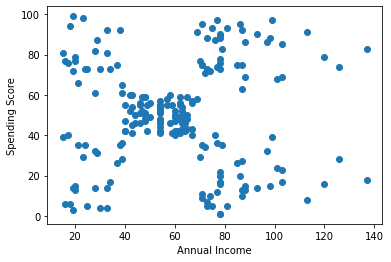

In [137]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<ipython-input-124-387cec4b611a>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newbook[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]


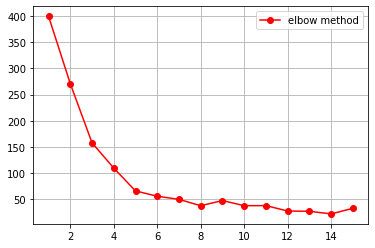

In [138]:
distortion_k = np.empty(15)
for i in range(1,16):
    codebook, dist = kmeans(standardized[:,[1,2]], i)
    distortion_k[i-1] = dist
plt.plot(range(1,16), distortion_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)


optimal k=5

<ipython-input-124-387cec4b611a>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newbook[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-139-763e9836e59a>:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-139-763e9836e59a>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block2 = np.vstack(row for row in matrix if row[-1] == 1)
<ipython-input-139-763e9836e59a>:7: FutureWarning:

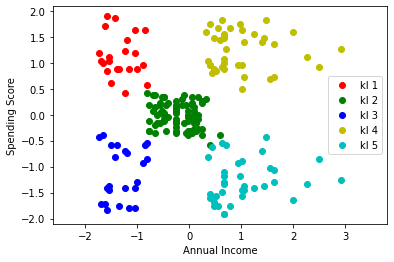

In [139]:
codebook, dist = kmeans(standardized[:,[1,2]], 5)
distortion = distance.cdist(standardized[:,[1,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[1,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)
block5 = np.vstack(row for row in matrix if row[-1] == 4)


plt.scatter(block1[:,0], block1[:,1], c='r', label='kl 1')
plt.scatter(block2[:,0], block2[:,1], c='g', label='kl 2')
plt.scatter(block3[:,0], block3[:,1], c='b', label='kl 3')
plt.scatter(block4[:,0], block4[:,1], c='y', label='kl 4')
plt.scatter(block5[:,0], block5[:,1], c='c', label='kl 5')
plt.axis('equal')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()